In [28]:
import os
import json
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from run_freq import _read_data

In [5]:
# from ../baseline.py
def _load_split(data_dir, source, split, n=np.inf):
    path = os.path.join(data_dir, f'{source}.{split}.jsonl')
    texts = []
    for i, line in enumerate(open(path)):
        if i >= n:
            break
        texts.append(json.loads(line)['text'])
    return texts

In [9]:
# Read jsonl file
data_dir = '../data/gpt2_jsonl'
source = 'webtext'
split = 'test'

webtext_text = _load_split(data_dir, source, split)

In [8]:
# Read .nll file
webtext_nll = _read_data('../data/data_gpt2_old/webtext.test.model=gpt2.nll')

In [19]:
print(len(webtext_text))
print(len(webtext_nll))
print(type(webtext_nll[0]))

5000
5000
<class 'list'>


In [21]:
# How the raw entropy distribution looks like
print(np.max([np.max(x) for x in webtext_nll]))
print(np.median([np.max(x) for x in webtext_nll]))

# Distribution of lengths
print(np.mean([len(x) for x in webtext_nll]))
print(np.median([len(x) for x in webtext_nll]))

32.6346
14.0087
579.0556
541.0


In [27]:
all_entropies = list(chain.from_iterable(webtext_nll))
all_entropies = np.array(all_entropies)
print(all_entropies.shape)

# summary of all_entropies
print(np.max(all_entropies))
print(np.min(all_entropies))
print(np.mean(all_entropies))
print(np.median(all_entropies))

(2895278,)
32.6346
-0.0
2.9652257285138073
2.1878


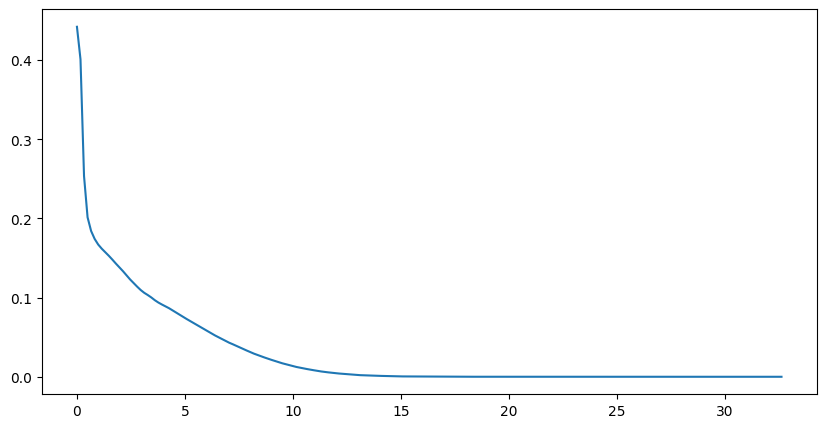

In [30]:
# Density plot of entropies
density = gaussian_kde(all_entropies)
x = np.linspace(np.min(all_entropies), np.max(all_entropies), 200)

plt.figure(figsize=(10, 5))
plt.plot(x, density(x))
plt.show()

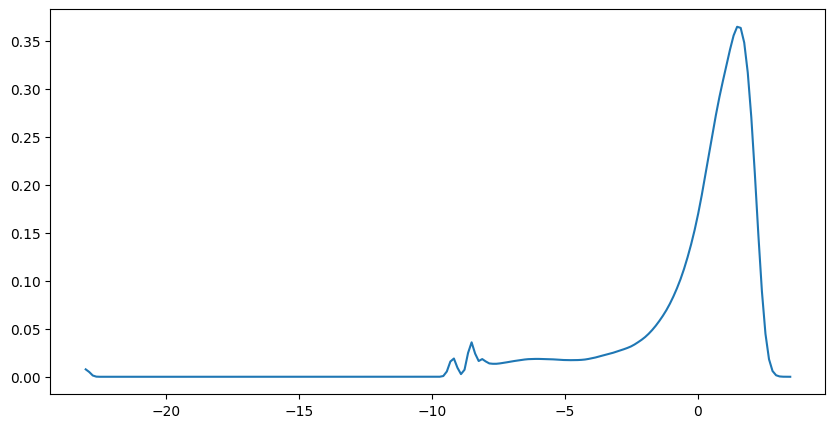

In [31]:
# Log tranform of entropies
eps = 1e-10
log_entropies = np.log(all_entropies + eps)

density = gaussian_kde(log_entropies)
x = np.linspace(np.min(log_entropies), np.max(log_entropies), 200)

plt.figure(figsize=(10, 5))
plt.plot(x, density(x))
plt.show()